# Number of deceased by date of death
# Aantal overledenen naar datum van overlijden
# Dataset 3 from rivm.nl/coronavirus-covid-19/grafieken

In [14]:
#Importing relevant library 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns 
import datetime

In [15]:
# Scrapping the 4 csv data from rivm.nl
request_data=requests.get('https://www.rivm.nl/coronavirus-covid-19/grafieken').text
soup = BeautifulSoup(request_data,'html.parser')
#print(soup.prettify())
my_table=soup.find_all('script', {'type':"application/json"})
my_table=str(my_table)
my_table=my_table.split("csv")

In [16]:
#Data cleaning process 
table_3 = my_table[2]
table_3 = table_3.replace('\\u0022', '')
table_3 = table_3.split("data:")[0]
table_3 = str(table_3).split(']","pre')[0]
table_3 = str(table_3).split("ren],")[1]
table_3 = table_3.replace("]", '')
table_3 = table_3.split("[")

In [17]:
#Setting the data frame 
df3 = pd.DataFrame([sub.split(",") for sub in table_3 ])
df3.drop([3], axis=1, inplace=True)
df3.drop(0,inplace=True)
df3.columns=["day_month","New_Cases","Previous_Cases"]

In [18]:
#Setting the date data to date form for pandas library
df3.New_Cases = pd.to_numeric(df3.New_Cases, downcast='integer')
df3.Previous_Cases = pd.to_numeric(df3.Previous_Cases, downcast='integer')
df3.loc[:,"Deaths"] = df3.New_Cases + df3.Previous_Cases

In [19]:
#Setting the date data to date form for pandas library
df3['Year']= '2020'
df3['date']=df3.day_month+' '+ df3.Year
df3.date=df3.date.str.replace("mrt","mar")
df3.date=df3.date.str.replace("mei","may")
df3.date=pd.to_datetime(df3.date).dt.date
df3.drop(['day_month'], axis=1, inplace=True)
df3.drop(['Year'], axis=1, inplace=True)
df3 = df3[['date', 'New_Cases', 'Previous_Cases', 'Deaths']]
#df3=df3.set_index('date')

In [20]:
df3.head()

,date,New_Cases,Previous_Cases,Deaths
1,2020-02-27,0,0,0
2,2020-02-28,0,0,0
3,2020-02-29,0,0,0
4,2020-03-01,0,0,0
5,2020-03-02,0,0,0


In [21]:
df3.tail()

,date,New_Cases,Previous_Cases,Deaths
135,2020-07-10,0,1,1
136,2020-07-11,0,0,0
137,2020-07-12,1,0,1
138,2020-07-13,0,0,0
139,2020-07-14,0,0,0


In [22]:
#df3.to_csv (r'C:\Users\dell\Desktop\Tableau_Covid19\data_rivm_death.csv',  index = True, header=True)

In [23]:
df3.Deaths.sum()

6129

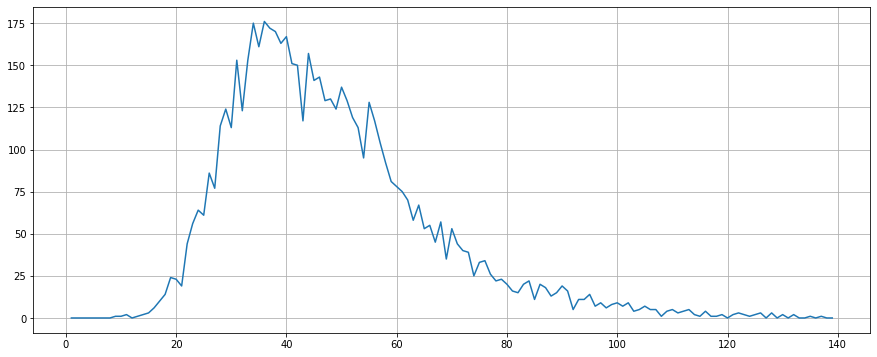

In [24]:
df3.Deaths.plot(kind='line', x='date', y='Deaths', grid=True, figsize=(15,6))

(array([737485., 737516., 737546., 737577., 737607.]),
 <a list of 5 Text major ticklabel objects>)

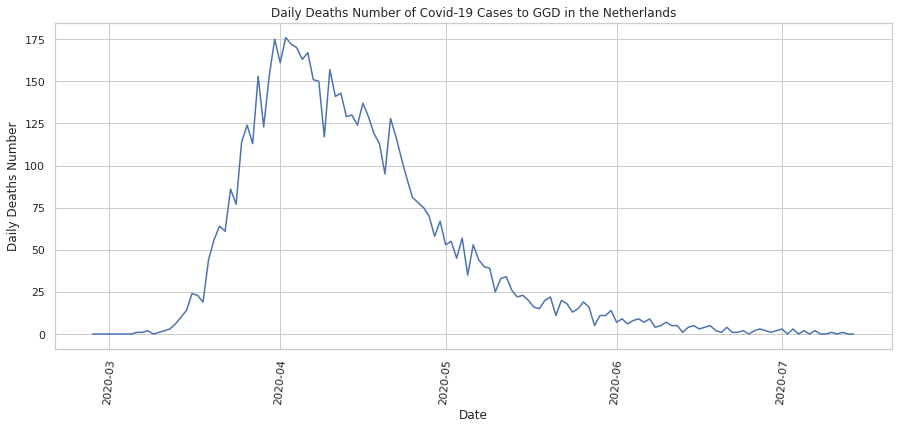

In [25]:
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.lineplot(y=df3.Deaths, x=df3.date, data=df3, palette='rainbow', ci=None)
ax.set(xlabel='Date', ylabel='Daily Deaths Number', title='Daily Deaths Number of Covid-19 Cases to GGD in the Netherlands')
plt.xticks(rotation=85)